In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dependencies for Linear Regression, Lasso and Random Forest Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Extraction

In [3]:
# SOURCE : https://data.equinor.com/
# https://www.equinor.com/en/news/14jun2018-disclosing-volve-data.html

# Production data from a field on the Norwegian continental shelf

In [4]:
# Read the csv file into a pandas DataFrame
all_wells = pd.read_csv('Data/Original_Data.csv')

## Data Exploration
Target Variable ( Dependent Variable) :AVG_DOWNHOLE_PRESSURE:(Downhole pressure of the well)

AVG_DOWNHOLE_TEMPERATURE  (Downhole temperature of the well)
AVG_DP_TUBING   (Delta Pressure: Its the difference between the Downhole pressure and Well head pressure)

The downhole pressure and temperature are measured using a guage.


AVG_ANNULUS_PRESS: Annular Pressure is the pressure exerted by the hydrocarbons in the annulus of a well or between two strings of casing inside a producing well.

AVG_CHOKE_SIZE_P   (Choke Size): is a type of control valves, to control the flow of well fluids being produced. Another purpose that the choke valves serve is to kill the pressure from reservoir and to regulate the downstream pressure in the flowlines

AVG_WHP_P  (Well head pressure)              
AVG_WHT_P  (Well head pressure)              
DP_CHOKE_SIZE (difference in pressure)
 
Oil, Gas and Water Volume output from the well

BORE_OIL_VOL              
BORE_GAS_VOL              
BORE_WAT_VOL    

In [5]:
all_wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   WELL_BORE_CODE            15634 non-null  object 
 2   NPD_WELL_BORE_CODE        15634 non-null  int64  
 3   NPD_WELL_BORE_NAME        15634 non-null  object 
 4   NPD_FIELD_CODE            15634 non-null  int64  
 5   NPD_FIELD_NAME            15634 non-null  object 
 6   NPD_FACILITY_CODE         15634 non-null  int64  
 7   NPD_FACILITY_NAME         15634 non-null  object 
 8   ON_STREAM_HRS             15349 non-null  float64
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 11  AVG_DP_TUBING             8980 non-null   float64
 12  AVG_ANNULUS_PRESS         7890 non-null   float64
 13  AVG_CHOKE_SIZE_P          8919 non-null   float64
 14  AVG_CH

In [6]:
all_wells.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.00,0.00,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.38,...,%,33.1,10.48,33.07,0.0,0.0,0.0,NaN,production,OP


## Data Cleaning

In [7]:
# Filtering out values of target variable that has zero values
all_wells_df =all_wells[(all_wells['AVG_DOWNHOLE_PRESSURE'] !=0)]

In [8]:
all_wells_df.astype(bool).sum(axis=0)

DATEPRD                     13322
WELL_BORE_CODE              13322
NPD_WELL_BORE_CODE          13322
NPD_WELL_BORE_NAME          13322
NPD_FIELD_CODE              13322
NPD_FIELD_NAME              13322
NPD_FACILITY_CODE           13322
NPD_FACILITY_NAME           13322
ON_STREAM_HRS               11758
AVG_DOWNHOLE_PRESSURE       13322
AVG_DOWNHOLE_TEMPERATURE    13322
AVG_DP_TUBING               13322
AVG_ANNULUS_PRESS           12272
AVG_CHOKE_SIZE_P            13116
AVG_CHOKE_UOM               13322
AVG_WHP_P                   13227
AVG_WHT_P                   13234
DP_CHOKE_SIZE                7120
BORE_OIL_VOL                12558
BORE_GAS_VOL                12560
BORE_WAT_VOL                12186
BORE_WI_VOL                 13019
FLOW_KIND                   13322
WELL_TYPE                   13322
dtype: int64

In [9]:
#Selecting rows only during the production state and dropping off shutdown period values
all_wells_df =all_wells_df.drop(all_wells_df[(all_wells_df['BORE_OIL_VOL'] == 0) & (all_wells_df['BORE_GAS_VOL'] == 0.0) & (all_wells_df['BORE_WAT_VOL'] == 0)].index)

In [10]:
all_wells_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12560 entries, 15 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   12560 non-null  object 
 1   WELL_BORE_CODE            12560 non-null  object 
 2   NPD_WELL_BORE_CODE        12560 non-null  int64  
 3   NPD_WELL_BORE_NAME        12560 non-null  object 
 4   NPD_FIELD_CODE            12560 non-null  int64  
 5   NPD_FIELD_NAME            12560 non-null  object 
 6   NPD_FACILITY_CODE         12560 non-null  int64  
 7   NPD_FACILITY_NAME         12560 non-null  object 
 8   ON_STREAM_HRS             12275 non-null  float64
 9   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 11  AVG_DP_TUBING             5943 non-null   float64
 12  AVG_ANNULUS_PRESS         5156 non-null   float64
 13  AVG_CHOKE_SIZE_P          6087 non-null   float64
 14  AVG_C

In [11]:
# Dropping all null values 
all_wells_df=all_wells_df.dropna(subset =["AVG_DOWNHOLE_PRESSURE"])

In [12]:
all_wells_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 15 to 8927
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5943 non-null   object 
 1   WELL_BORE_CODE            5943 non-null   object 
 2   NPD_WELL_BORE_CODE        5943 non-null   int64  
 3   NPD_WELL_BORE_NAME        5943 non-null   object 
 4   NPD_FIELD_CODE            5943 non-null   int64  
 5   NPD_FIELD_NAME            5943 non-null   object 
 6   NPD_FACILITY_CODE         5943 non-null   int64  
 7   NPD_FACILITY_NAME         5943 non-null   object 
 8   ON_STREAM_HRS             5943 non-null   float64
 9   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 11  AVG_DP_TUBING             5943 non-null   float64
 12  AVG_ANNULUS_PRESS         5021 non-null   float64
 13  AVG_CHOKE_SIZE_P          5943 non-null   float64
 14  AVG_CHO

## Dropping columns

(Codes, Names, Hrs)

 2   NPD_WELL_BORE_CODE        5940 non-null   int64  
 
 3   NPD_WELL_BORE_NAME        5940 non-null   object
 
 4   NPD_FIELD_CODE            5940 non-null   int64  
 
 5   NPD_FIELD_NAME            5940 non-null   object 
 
 6   NPD_FACILITY_CODE         5940 non-null   int64  
 
 7   NPD_FACILITY_NAME         5940 non-null   object 
 
 8   ON_STREAM_HRS             5940 non-null   float64
 
  
 

In [13]:
df=all_wells_df.drop(all_wells_df.columns[2:9], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 15 to 8927
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   5943 non-null   object 
 1   WELL_BORE_CODE            5943 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 3   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 4   AVG_DP_TUBING             5943 non-null   float64
 5   AVG_ANNULUS_PRESS         5021 non-null   float64
 6   AVG_CHOKE_SIZE_P          5943 non-null   float64
 7   AVG_CHOKE_UOM             5943 non-null   object 
 8   AVG_WHP_P                 5943 non-null   float64
 9   AVG_WHT_P                 5943 non-null   float64
 10  DP_CHOKE_SIZE             5943 non-null   float64
 11  BORE_OIL_VOL              5943 non-null   float64
 12  BORE_GAS_VOL              5943 non-null   float64
 13  BORE_WAT_VOL              5943 non-null   float64
 14  BORE_WI

Pressure difference between top and bottom of well

 4  AVG_DP_TUBING             
 
 Its not measured on the surace
 
 5  AVG_ANNULUS_PRESS         
 
 No Data
 
 14  BORE_WI_VOL               0 non-null      float64
 
Symbol

7   AVG_CHOKE_UOM 
 
 

In [14]:
# Date Column
df=df.drop(df.columns[0], axis =1)

In [15]:
df=df.drop(df.columns[3:5], axis =1)

In [16]:
df=df.drop(df.columns[4], axis =1)

In [17]:
df=df.drop(df.columns[10], axis =1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 15 to 8927
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            5943 non-null   object 
 1   AVG_DOWNHOLE_PRESSURE     5943 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  5943 non-null   float64
 3   AVG_CHOKE_SIZE_P          5943 non-null   float64
 4   AVG_WHP_P                 5943 non-null   float64
 5   AVG_WHT_P                 5943 non-null   float64
 6   DP_CHOKE_SIZE             5943 non-null   float64
 7   BORE_OIL_VOL              5943 non-null   float64
 8   BORE_GAS_VOL              5943 non-null   float64
 9   BORE_WAT_VOL              5943 non-null   float64
 10  FLOW_KIND                 5943 non-null   object 
 11  WELL_TYPE                 5943 non-null   object 
dtypes: float64(9), object(3)
memory usage: 603.6+ KB


In [22]:
# Each well data
df["WELL_BORE_CODE"].value_counts()

NO 15/9-F-14 H    2703
NO 15/9-F-11 H    1118
NO 15/9-F-12 H     925
NO 15/9-F-15 D     767
NO 15/9-F-1 C      430
Name: WELL_BORE_CODE, dtype: int64

In [20]:
#  df.to_csv('Data/well_cleaned.csv')

In [23]:
df["WELL_TYPE"].value_counts()

OP    5942
WI       1
Name: WELL_TYPE, dtype: int64

In [24]:
df=df.loc[df["WELL_TYPE"]=='OP']

In [25]:
df["FLOW_KIND"].value_counts()

production    5942
Name: FLOW_KIND, dtype: int64

In [26]:
# Final Data for Exploratory data analysis
df=df.iloc[:,:10]
df

,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
15,NO 15/9-F-1 C,289.42,106.35,43.34,107.36,37.94,78.94,631.47,90439.09,0.00
16,NO 15/9-F-1 C,270.24,107.64,47.17,99.19,60.76,70.63,1166.46,165720.39,0.00
17,NO 15/9-F-1 C,262.84,107.87,47.73,94.60,63.05,66.05,1549.81,221707.31,0.00
18,NO 15/9-F-1 C,255.53,107.97,48.53,89.99,64.55,61.41,1248.70,178063.52,0.00
19,NO 15/9-F-1 C,247.20,108.05,49.84,84.78,65.72,56.15,1345.78,192602.19,0.00
...,...,...,...,...,...,...,...,...,...,...
8923,NO 15/9-F-15 D,194.98,106.52,31.58,15.81,49.02,1.26,144.01,23201.35,203.93
8924,NO 15/9-F-15 D,194.98,106.52,31.54,15.77,48.99,1.20,145.22,23068.07,202.93
8925,NO 15/9-F-15 D,194.32,106.52,31.52,15.70,50.10,1.28,142.74,23059.68,203.84
8926,NO 15/9-F-15 D,195.21,106.51,31.52,15.61,49.84,1.20,144.46,23090.47,202.76


Drop columns Well Type( only consider OP wells) and FLow Kind-production only

# Exploratory Data Analysis (EDA) process

## Pair Plots to see relationship between each columns

Check for Multicollinearity between the features, high inter-correlations or inter-associations among the independent features, if present weakens the statistical power. 

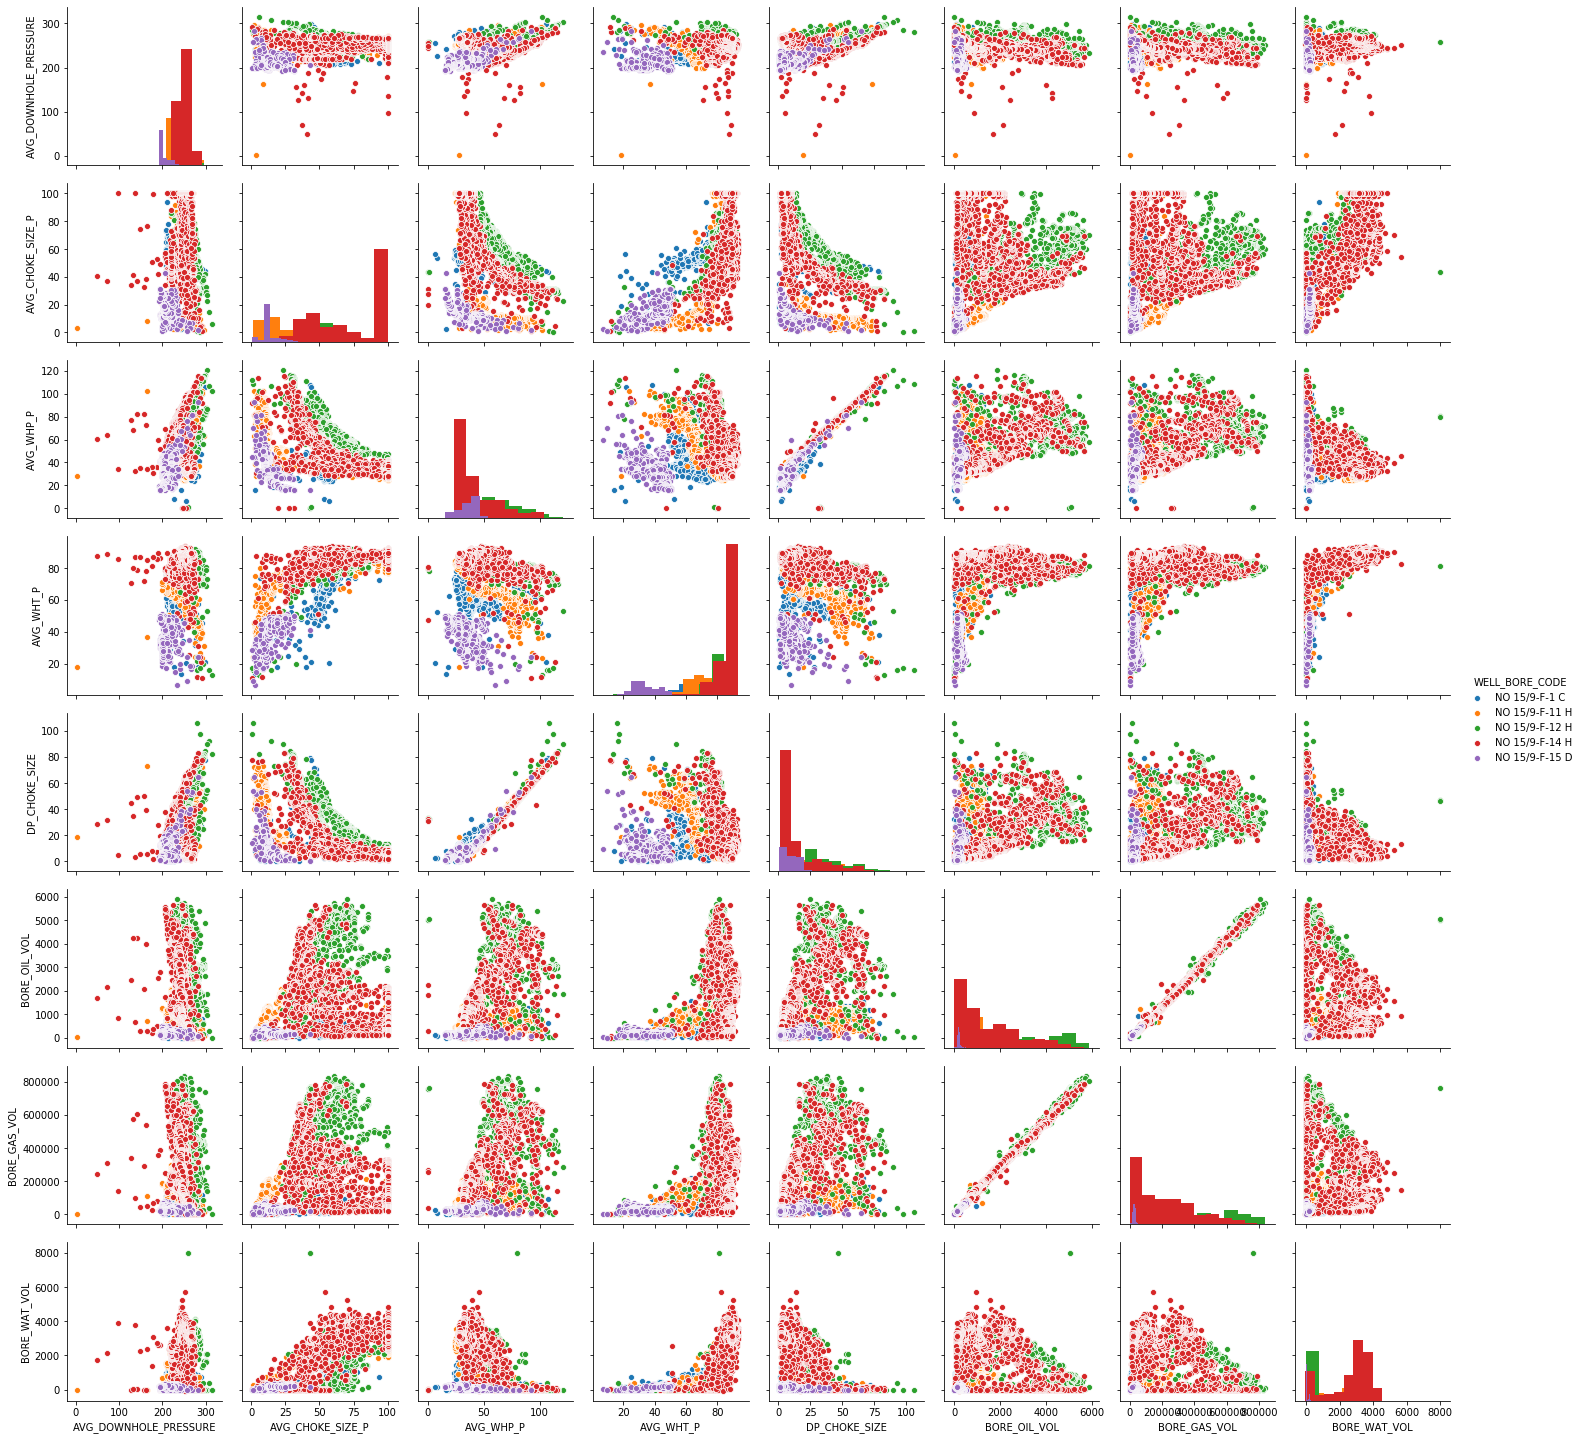

In [109]:
#make pairplots
import seaborn as sns
sns_plot1=sns.pairplot(df, vars = ["AVG_DOWNHOLE_PRESSURE",
                                "AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","DP_CHOKE_SIZE",
                                "BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"],diag_kind="hist", hue="WELL_BORE_CODE")

In [110]:
sns_plot1.savefig("wells_pairwise.png")

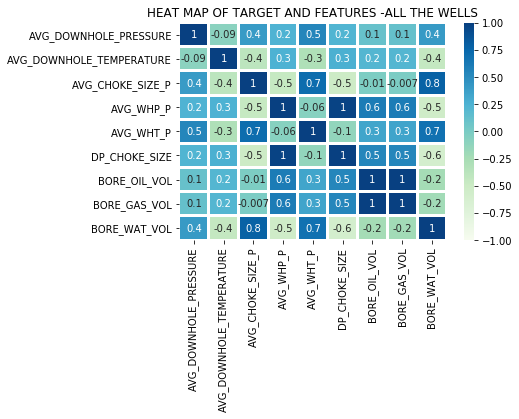

In [87]:
sns.heatmap(df.corr(), annot=True,fmt = '.1g', cmap= 'GnBu',linewidths=2,vmin=-1, vmax=1, center= 0)
plt.title('HEAT MAP OF TARGET AND FEATURES -ALL THE WELLS')   
plt.show() 

## INFERENCES from pairplot

Average Well head pressure and DP Choke size are  perfectly correlated.

Oil vol and Gas Vol are also correlated.

Use only any one of the correlated feature in Multi linear regression model

Average Downhole pressure and Average DOwnhole temperature are the measurement which downhole gauge measures. We are only taking one target variable Average Downhole pressure (it is the costlier equiptment during maintenance- during full-field development or with passing time)

DP Tubing is a difference in pressure of DH Well pressure and Well head pressure

Target Variable :AVG_DOWNHOLE_PRESSURE

Features (independent varaibles): AVG_ANNULUS_PRESS , AVG_CHOKE_SIZE_P, AVG_WHP_P, AVG_WHT_P, BORE_OIL_VOL, BORE_GAS_VOL, BORE_WAT_VOL

Filtering out data for Linear Regression

DP_CHOKE_SIZE & AVG_WHP_P 

Oil Volume and Water Volume

are perfectly correlated

For the Multi-linear regression model will take only one among the correlated columns

## Linear Regression

In [89]:
# Use Pandas get_dummies to convert categorical data
X = pd.get_dummies(df[["AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_WAT_VOL","WELL_BORE_CODE"]])
print(X.shape)
y= df["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
y.shape

(5942, 10)


(5942, 1)

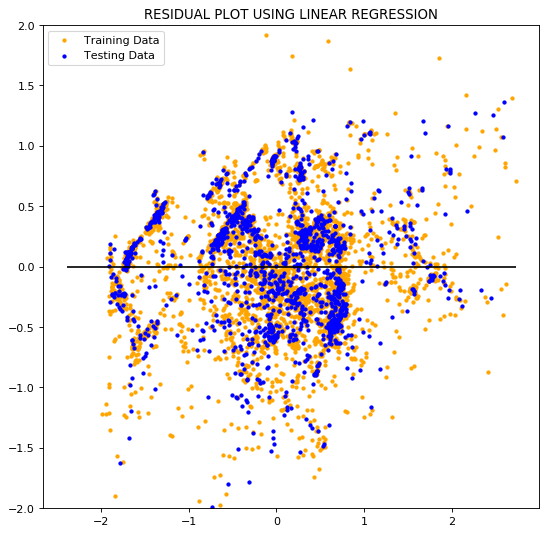

-----------------------------------
Mean Squared Error (MSE) Train Data: 0.3170199592328276
R-squared (R2) Train Data: 0.6829800407671724
-----------------------------------
Mean Squared Error (MSE) Test Data: 0.41588749268577857
R-squared (R2) Test Data: 0.6288743513075798


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#  Well name is taken as dummy variable 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()

from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
model.fit(X_train_scaled, y_train_scaled)

# Plot the Residuals for the Training and Testing data
predictions = model.predict(X_train_scaled)
predictions1 = model.predict(X_test_scaled)

# Plot Residuals
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(predictions, predictions - y_train_scaled, c= "orange",label="Training Data", s=8)
plt.scatter(predictions1, predictions1 - y_test_scaled, c= "blue",label="Testing Data",s=8)
plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("RESIDUAL PLOT USING LINEAR REGRESSION")
plt.legend()
plt.show()

# Model Scores

from sklearn.metrics import mean_squared_error, r2_score

# Score the prediction with mse and r2
mse_train = mean_squared_error(y_train_scaled, predictions)
r2_train = r2_score(y_train_scaled, predictions)

mse_test = mean_squared_error(y_test_scaled, predictions1)
r2_test = r2_score(y_test_scaled, predictions1)

# print(f"R-squared (R2) Test Data: {round(r2_test,2)}")
# print(f"Mean Squared Error (MSE) Test Data: {round(mse_test,2)}")

print("-----------------------------------")

print(f"Mean Squared Error (MSE) Train Data: {mse_train}")
print(f"R-squared (R2) Train Data: {r2_train}")
print("-----------------------------------")
print(f"Mean Squared Error (MSE) Test Data: {mse_test}")
print(f"R-squared (R2) Test Data: {r2_test}")

In [91]:
print(model.coef_)
X.columns

[[ 0.15460619  0.6540802   0.16334028 -0.65015801  0.32098075 -0.0857695
  -0.11658348  0.40223305  0.02196917 -0.27109303]]


Index(['AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'BORE_OIL_VOL',
       'BORE_WAT_VOL', 'WELL_BORE_CODE_NO 15/9-F-1 C',
       'WELL_BORE_CODE_NO 15/9-F-11 H', 'WELL_BORE_CODE_NO 15/9-F-12 H',
       'WELL_BORE_CODE_NO 15/9-F-14 H', 'WELL_BORE_CODE_NO 15/9-F-15 D'],
      dtype='object')

## Linear Regression Model Score

In [92]:
print(f"R-squared (R2) Test Data: {round(r2_test,2)}")
print(f"Mean Squared Error (MSE) Test Data: {round(mse_test,2)}")

R-squared (R2) Test Data: 0.63
Mean Squared Error (MSE) Test Data: 0.42


## Lasso Regression

In [93]:
# Including all the features 

In [94]:
X2 = pd.get_dummies(df[["WELL_BORE_CODE","AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P", "DP_CHOKE_SIZE","BORE_OIL_VOL","BORE_GAS_VOL", "BORE_WAT_VOL" ]])
print(X.shape)
y2= df["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
y2.shape

(5942, 10)


(5942, 1)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=42)


In [96]:
from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

feature_names= X2.columns
print(sorted(zip(lasso.coef_,X.columns),reverse=True))
print("--------------------------------------------------------------------------------")
print(f"MSE: {MSE}, R2: {r2}")

[(0.6801514010908759, 'BORE_OIL_VOL'), (0.4617435037278769, 'WELL_BORE_CODE_NO 15/9-F-15 D'), (0.4207811806459125, 'WELL_BORE_CODE_NO 15/9-F-11 H'), (0.1567241902145469, 'AVG_WHT_P'), (0.15199498159050887, 'AVG_CHOKE_SIZE_P'), (-0.0, 'WELL_BORE_CODE_NO 15/9-F-14 H'), (-0.0, 'BORE_WAT_VOL'), (0.0, 'AVG_WHP_P'), (-0.001381753120898549, 'WELL_BORE_CODE_NO 15/9-F-12 H'), (-0.5399795577691613, 'WELL_BORE_CODE_NO 15/9-F-1 C')]
--------------------------------------------------------------------------------
MSE: 0.3887816368233253, R2: 0.6530628121707605


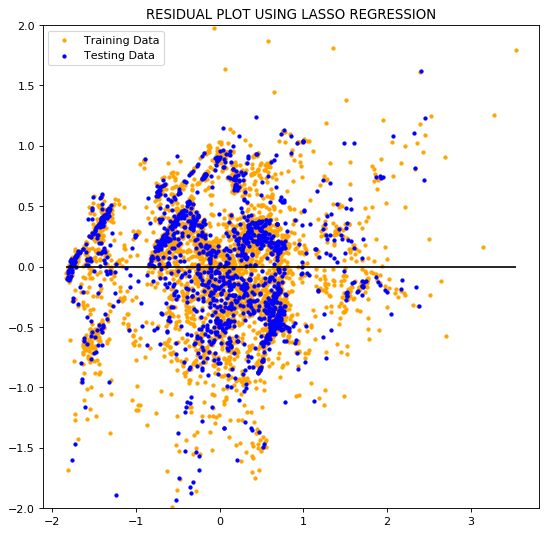

In [97]:
# Plot the Residuals for the Training and Testing data
predictions = lasso.predict(X_train_scaled)
predictions1 = lasso.predict(X_test_scaled)

# Plot Residuals
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(predictions, predictions - y_train_scaled.ravel(), c= "orange",label="Training Data", s=8)
plt.scatter(predictions1, predictions1 - y_test_scaled.ravel(), c= "blue",label="Testing Data",s=8)
plt.ylim(-2,2)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("RESIDUAL PLOT USING LASSO REGRESSION")
plt.legend()
plt.show()
# print(f"R-squared (R2) Test Data: {round(r2,2)}")
# print(f"Mean Squared Error (MSE) Test Data: {round(MSE,2)}")

## Lasso Regression Model Score

In [98]:
print(f"R-squared (R2) Test Data: {round(r2,2)}")
print(f"Mean Squared Error (MSE) Test Data: {round(MSE,2)}")

R-squared (R2) Test Data: 0.65
Mean Squared Error (MSE) Test Data: 0.39


## Random Forest Regression

In [99]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
# Use Pandas get_dummies to convert categorical data
X = df[["AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"]]
print(X.shape)
y= df["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
y.shape

(5942, 6)


(5942, 1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [101]:

rf = RandomForestRegressor(n_estimators=100,max_depth=100)
rf = rf.fit(X_train_scaled, y_train_scaled.ravel())

predictions_train = rf.predict(X_train_scaled)
predictions_test = rf.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled.ravel(), predictions_test)
r2 = rf.score(X_test_scaled, y_test_scaled.ravel())

print (MSE)
print (r2)

0.19973875612012576
0.8217590652813743


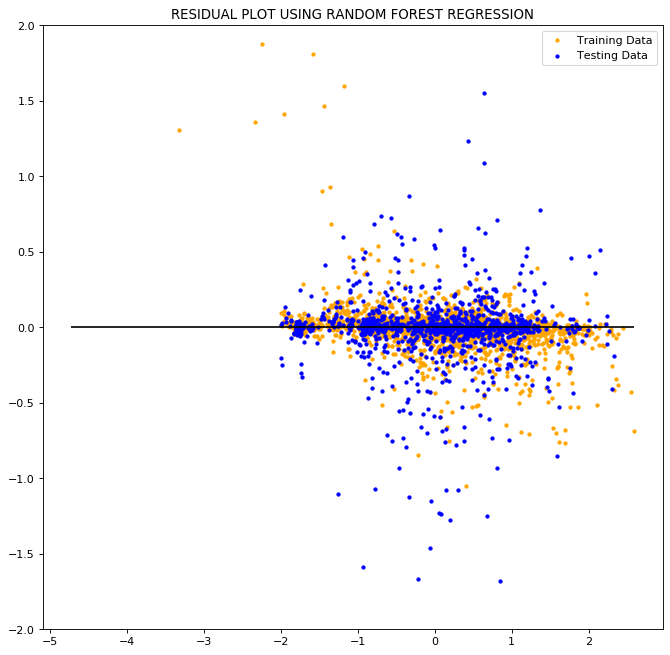

R-squared (R2) Test Data: 0.82
Mean Squared Error (MSE) Test Data: 0.2


In [108]:
# Plot Residuals
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(predictions_train, predictions_train - y_train_scaled.ravel(), c= "orange",label="Training Data", s=8)
plt.scatter(predictions_test, predictions_test - y_test_scaled.ravel(), c= "blue",label="Testing Data",s=8)
plt.ylim(-2,2)
plt.title("RESIDUAL PLOT USING RANDOM FOREST REGRESSION")
plt.hlines(y=0, xmin=predictions_train.min(), xmax=predictions_train.max())
plt.legend()
plt.show()
print(f"R-squared (R2) Test Data: {round(r2,2)}")
print(f"Mean Squared Error (MSE) Test Data: {round(MSE,2)}")

In [118]:
importances= rf.feature_importances_
importances=np.round(importances, 2)
sorted(zip(importances,X.columns),reverse=True)

[(0.54, 'AVG_WHP_P'),
 (0.2, 'AVG_CHOKE_SIZE_P'),
 (0.14, 'BORE_WAT_VOL'),
 (0.07, 'AVG_WHT_P'),
 (0.03, 'BORE_OIL_VOL'),
 (0.02, 'BORE_GAS_VOL')]